In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Using device=mps
Jupyter=True, MatPlotLib.isinteractive()=False
Unique ID: qTJg6lZgTDKO75wCRhl3nQ
PlotVideoMaker: Hyper-Training, auto-save=True
middle-C=261.63 Hz
PlotVideoMaker: STFT_Video, auto-save=True
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1024 samples, duration=2.0 sec = 86 time steps
Max frequency=22050 Hz --> freq_buckets=1025
STFT file already created: STFT 44100 Hz, size=1024, hop=1024.pkl
1 sample = 1,025 x 86 = 88,150
fail_loss=88200, last_saved_loss=44100



Optimising Hyper Parameters for AudioConv_AE

last_saved_loss= 22050
fail_loss=15000, last_saved_loss=7500
Loaded 1017 samples from Audio 44100.pkl
1017 samples
Most diverse 200 samples: ['Grungy Spike C4.wav', 'Analog VCO 1 Squ C4.wav', 'Analog Deep C3.wav', 'Analog Saturation C4.wav', 'Analog Squ Osc Reset C4.wav', 'Analog Saturation C3.wav', 'Analog Conquest C3.wav', 'Sine C3.wav', '80s Digital Synth Dirty Sine C3.wav', 'Amanda Mm 3 C3.wav', '80s Digital Synth Dirty Sine C4.wav', 'Overtone Flute C4.wav',

Adam: 820,326 trainable parameters
total=1.9 sec, epoch=1 (1.9 sec/epoch), train=22359.92 (0.00%), test=23130.52 (0.00%), overfit=1.03
*** Aborting: model exploded! loss=88313 vs max=88,200


Hyper-Parameter tuning#6/80: AudioConv_AE [4, -6, 2, 38, 71, 25]
AudioConv_AE layers=2, kernels=38, size=71, stride=25
encoded shape=(38, 139), size=5282
decoded shape=(1, 88071), size=88071
AudioConv_AE 210,559 parameters, compression=16.7
Compression=16.7 out of range [49, 10000]


Hyper-Parameter tuning#7/80: AudioConv_AE [6, -6, 4, 24, 102, 21]
AudioConv_AE layers=4, kernels=24, size=102, stride=21
AudioConv_AE: only has depth=3 instead of 4
Compression=0.0 out of range [49, 10000]


Hyper-Parameter tuning#8/80: AudioConv_AE [4, -5, 3, 21, 29, 39]
AudioConv_AE layers=3, kernels=21, size=29, stride=39
AudioConv_AE: only has depth=2 instead of 3
Compression=0.0 out of range [49, 10000]


Hyper-Parameter tuning#9/80: AudioConv_AE [3, -5, 5, 59, 22, 60]
AudioConv_AE layers=5, kernels=59, size=22, 

total=176.7 sec, epoch=94 (1.9 sec/epoch), train=11128.84 (-0.05%), test=13174.39 (0.17%), overfit=1.18
total=182.6 sec, epoch=97 (1.9 sec/epoch), train=11131.42 (-0.02%), test=13182.51 (0.23%), overfit=1.18
total=188.4 sec, epoch=100 (1.9 sec/epoch), train=11102.14 (-0.08%), test=13135.03 (-0.04%), overfit=1.18
total=194.3 sec, epoch=103 (1.9 sec/epoch), train=11098.17 (-0.03%), test=13145.18 (-0.03%), overfit=1.18
total=200.1 sec, epoch=106 (1.9 sec/epoch), train=11081.53 (-0.06%), test=13130.54 (0.04%), overfit=1.18
total=205.9 sec, epoch=109 (1.9 sec/epoch), train=11070.19 (-0.04%), test=13154.22 (0.22%), overfit=1.19
total=211.6 sec, epoch=112 (1.9 sec/epoch), train=11063.10 (-0.03%), test=13130.14 (-0.07%), overfit=1.19
total=217.5 sec, epoch=115 (1.9 sec/epoch), train=11051.00 (-0.05%), test=13123.37 (-0.00%), overfit=1.19
total=223.4 sec, epoch=118 (1.9 sec/epoch), train=11040.95 (-0.05%), test=13143.39 (0.25%), overfit=1.19
total=229.2 sec, epoch=121 (1.9 sec/epoch), train=110

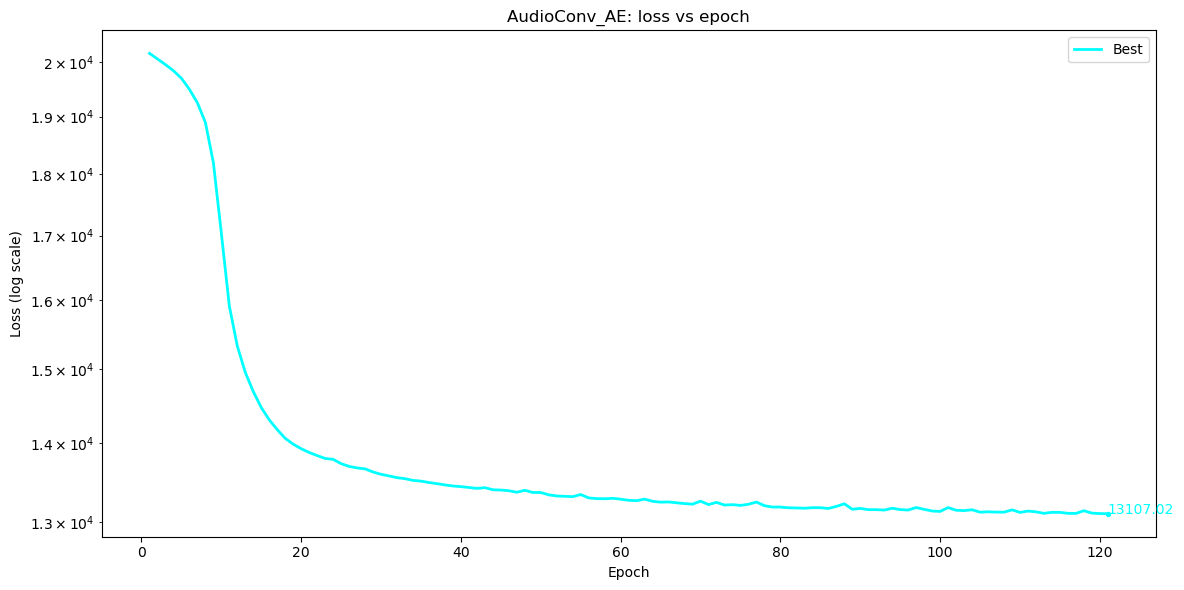

saving video Videos/Hyper-Training - qTJg6lZgTDKO75wCRhl3nQ.gif, 1 frames = 3.0 sec @ 0.3 FPS
adjusted final loss=10922.35, from loss=11027.06 and rate=-0.032%

Best hyper parameters:
#1 10922.35, AudioConv_AE layers=6, kernels=54, size=26, stride=4 (params=761,563, compression=116.7x) | Adam batch=8, learning_rate=8e-06, weight_decay=0 | real loss=11027.06, rate=-0.032%




Hyper-Parameter tuning#21/80: AudioConv_AE [2, -6, 6, 56, 98, 44]
AudioConv_AE layers=6, kernels=56, size=98, stride=44
AudioConv_AE: only has depth=2 instead of 6
Compression=0.0 out of range [49, 10000]


Hyper-Parameter tuning#22/80: AudioConv_AE [2, -6, 6, 54, 25, 3]
AudioConv_AE layers=6, kernels=54, size=25, stride=3
encoded shape=(54, 110), size=5940
decoded shape=(1, 88198), size=88198
AudioConv_AE 732,295 parameters, compression=14.8
Compression=14.8 out of range [49, 10000]


Hyper-Parameter tuning#23/80: AudioConv_AE [3, -6, 6, 30, 26, 4]
AudioConv_AE layers=6, kernels=30, size=26, stride=4
encoded shape

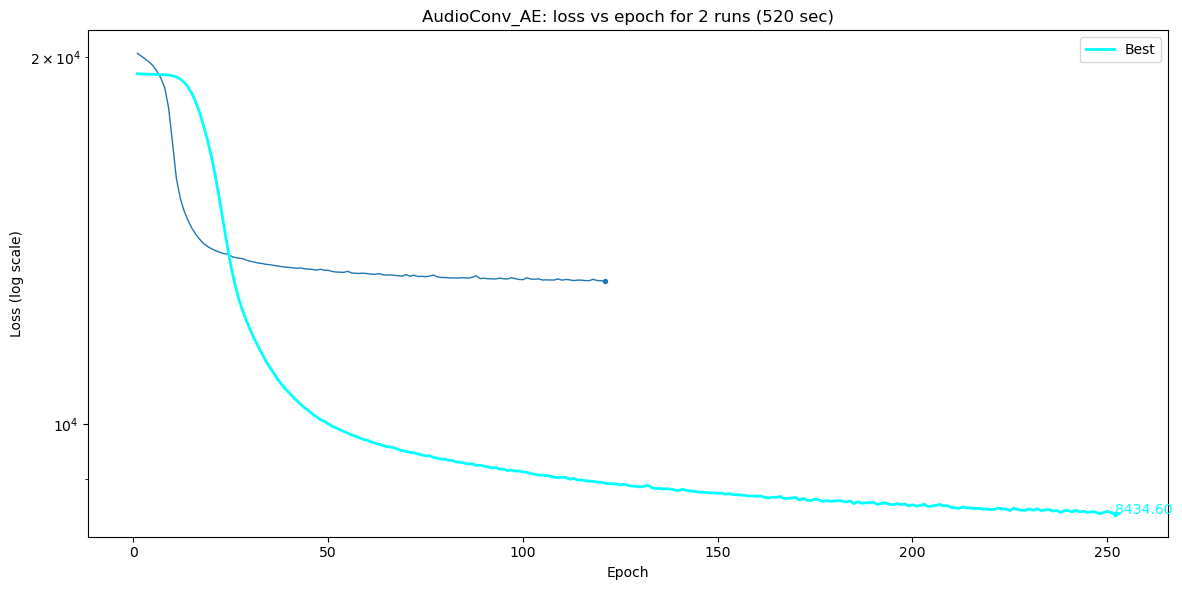

saving video Videos/Hyper-Training - qTJg6lZgTDKO75wCRhl3nQ.gif, 2 frames = 3.0 sec @ 0.7 FPS
adjusted final loss=7129.64, from loss=7212.52 and rate=-0.039%

Best hyper parameters:
#1 7129.64, AudioConv_AE layers=6, kernels=30, size=26, stride=4 (params=235,891, compression=210.0x) | Adam batch=8, learning_rate=8e-06, weight_decay=0 | real loss=7212.52, rate=-0.039%
#2 10922.35, AudioConv_AE layers=6, kernels=54, size=26, stride=4 (params=761,563, compression=116.7x) | Adam batch=8, learning_rate=8e-06, weight_decay=0 | real loss=11027.06, rate=-0.032%




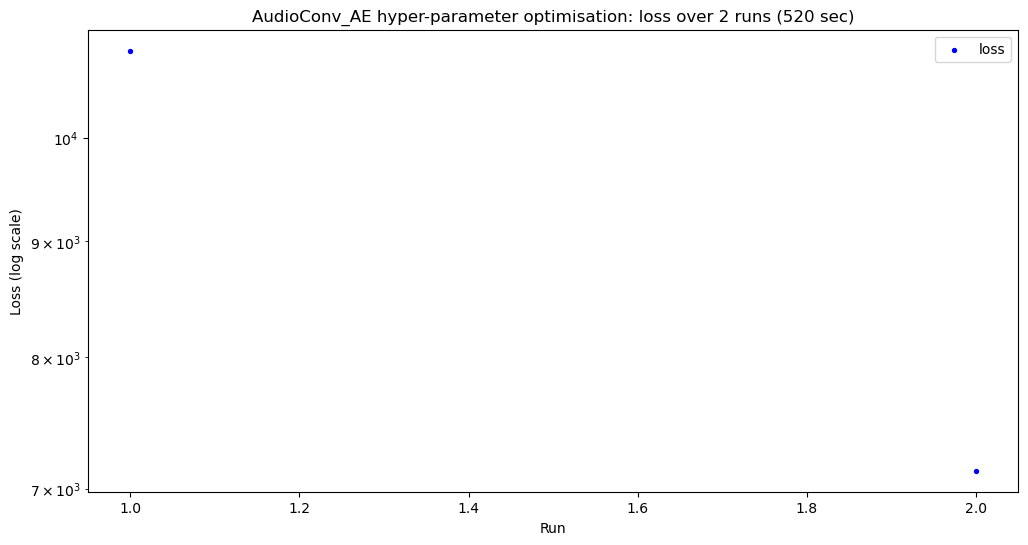



Hyper-Parameter tuning#24/80: AudioConv_AE [3, -6, 6, 20, 25, 41]
AudioConv_AE layers=6, kernels=20, size=25, stride=41
AudioConv_AE: only has depth=2 instead of 6
Compression=0.0 out of range [49, 10000]


Hyper-Parameter tuning#25/80: AudioConv_AE [3, -6, 6, 20, 26, 4]
AudioConv_AE layers=6, kernels=20, size=26, stride=4
encoded shape=(20, 14), size=280
decoded shape=(1, 87374), size=87374
AudioConv_AE 105,261 parameters, compression=315.0
AudioConv_AE(
  (encoder): Sequential(
    (0): Conv1d(1, 20, kernel_size=(26,), stride=(4,))
    (1): Conv1d(20, 20, kernel_size=(26,), stride=(4,))
    (2): Conv1d(20, 20, kernel_size=(26,), stride=(4,))
    (3): Conv1d(20, 20, kernel_size=(26,), stride=(4,))
    (4): Conv1d(20, 20, kernel_size=(26,), stride=(4,))
    (5): Conv1d(20, 20, kernel_size=(26,), stride=(4,))
    (6): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(20, 20, kernel_size=(26,), stride=(4,))
    (1): ConvTranspose1d(20, 20, kernel

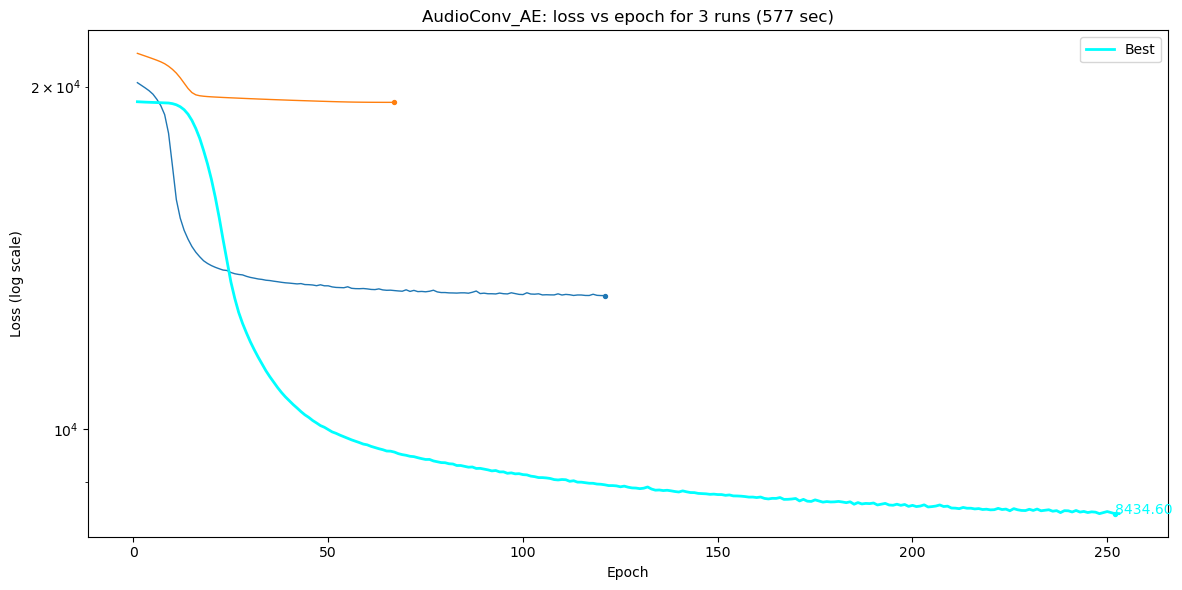

saving video Videos/Hyper-Training - qTJg6lZgTDKO75wCRhl3nQ.gif, 3 frames = 3.0 sec @ 1.0 FPS


Hyper-Parameter tuning#26/80: AudioConv_AE [3, -6, 6, 60, 25, 4]
AudioConv_AE layers=6, kernels=60, size=25, stride=4
encoded shape=(60, 14), size=840
decoded shape=(1, 86009), size=86009
AudioConv_AE 903,661 parameters, compression=105.0
AudioConv_AE(
  (encoder): Sequential(
    (0): Conv1d(1, 60, kernel_size=(25,), stride=(4,))
    (1): Conv1d(60, 60, kernel_size=(25,), stride=(4,))
    (2): Conv1d(60, 60, kernel_size=(25,), stride=(4,))
    (3): Conv1d(60, 60, kernel_size=(25,), stride=(4,))
    (4): Conv1d(60, 60, kernel_size=(25,), stride=(4,))
    (5): Conv1d(60, 60, kernel_size=(25,), stride=(4,))
    (6): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(60, 60, kernel_size=(25,), stride=(4,))
    (1): ConvTranspose1d(60, 60, kernel_size=(25,), stride=(4,))
    (2): ConvTranspose1d(60, 60, kernel_size=(25,), stride=(4,))
    (3): ConvTranspose

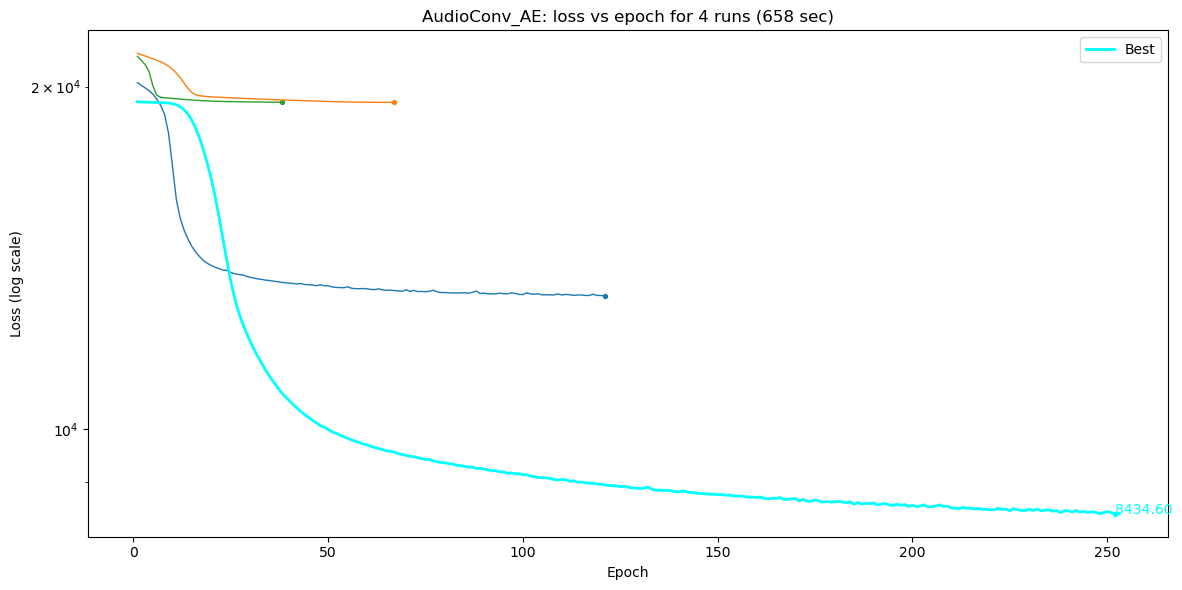

saving video Videos/Hyper-Training - qTJg6lZgTDKO75wCRhl3nQ.gif, 4 frames = 3.0 sec @ 1.3 FPS


Hyper-Parameter tuning#27/80: AudioConv_AE [3, -6, 6, 37, 26, 4]
AudioConv_AE layers=6, kernels=37, size=26, stride=4
encoded shape=(37, 14), size=518
decoded shape=(1, 87374), size=87374
AudioConv_AE 358,272 parameters, compression=170.3
AudioConv_AE(
  (encoder): Sequential(
    (0): Conv1d(1, 37, kernel_size=(26,), stride=(4,))
    (1): Conv1d(37, 37, kernel_size=(26,), stride=(4,))
    (2): Conv1d(37, 37, kernel_size=(26,), stride=(4,))
    (3): Conv1d(37, 37, kernel_size=(26,), stride=(4,))
    (4): Conv1d(37, 37, kernel_size=(26,), stride=(4,))
    (5): Conv1d(37, 37, kernel_size=(26,), stride=(4,))
    (6): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(37, 37, kernel_size=(26,), stride=(4,))
    (1): ConvTranspose1d(37, 37, kernel_size=(26,), stride=(4,))
    (2): ConvTranspose1d(37, 37, kernel_size=(26,), stride=(4,))
    (3): ConvTranspose

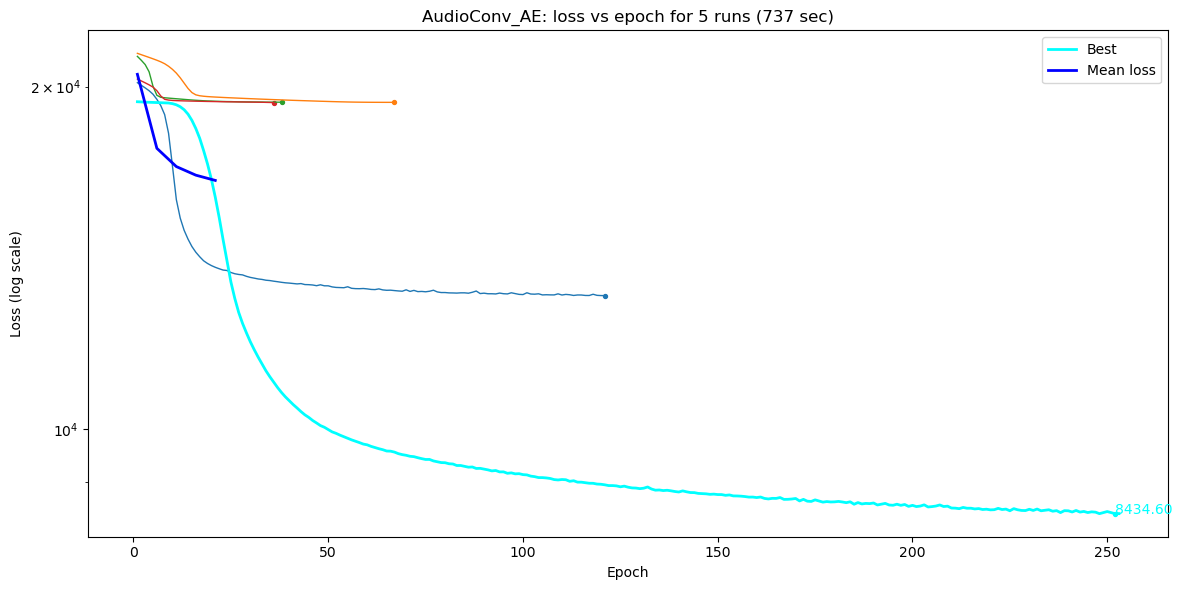

saving video Videos/Hyper-Training - qTJg6lZgTDKO75wCRhl3nQ.gif, 5 frames = 3.0 sec @ 1.7 FPS


Hyper-Parameter tuning#28/80: AudioConv_AE [3, -6, 6, 28, 26, 4]
AudioConv_AE layers=6, kernels=28, size=26, stride=4
encoded shape=(28, 14), size=392
decoded shape=(1, 87374), size=87374
AudioConv_AE 205,605 parameters, compression=225.0
AudioConv_AE(
  (encoder): Sequential(
    (0): Conv1d(1, 28, kernel_size=(26,), stride=(4,))
    (1): Conv1d(28, 28, kernel_size=(26,), stride=(4,))
    (2): Conv1d(28, 28, kernel_size=(26,), stride=(4,))
    (3): Conv1d(28, 28, kernel_size=(26,), stride=(4,))
    (4): Conv1d(28, 28, kernel_size=(26,), stride=(4,))
    (5): Conv1d(28, 28, kernel_size=(26,), stride=(4,))
    (6): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (decoder): Sequential(
    (0): ConvTranspose1d(28, 28, kernel_size=(26,), stride=(4,))
    (1): ConvTranspose1d(28, 28, kernel_size=(26,), stride=(4,))
    (2): ConvTranspose1d(28, 28, kernel_size=(26,), stride=(4,))
    (3): ConvTranspose

KeyboardInterrupt: 

In [2]:
from HyperParameterTuning import *


#set_display_hiddens(True) # interesting but annoying

set_fail_loss(audio_length)
#full_hypertrain("AudioConv_VAE") # little chance of this working...
full_hypertrain("AudioConv_AE")
#train_best_params("AudioConv_AE", [4, -6, 3, 30, 139, 4])


stop()

# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

In [ ]:
# Read all available samples and convert to STFTs
# This is performed automatically in the back-ground, but you can force it manually here with plots of the rejected audio files.
#make_STFTs(True)

#test_stft_conversions("Samples/Piano C4 Major 13 - 44.1 kHz.wav")
#stop()

In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"
#model = "RNN_VAE"
#model = "RNN_VAE_Incremental"

#model = "StepWiseMLP"
#model = "MLP_VAE"
#model = "MLPVAE_Incremental"

#model = "RNN_F&T"

#model = "STFT_VAE"

#model = "Conv2D_AE"
#model = "Conv2D_VAE_Incremental"

model = "AudioConv_VAE_Incremental"
#model = "AudioConv_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
#train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


In [ ]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Print some pretty pictures of the samples and their encodings
demo_encodings()

# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Generate samples, interpolate, morph etc.
demo_sounds()


